# Telecom Churn Case Study

### Part I - Data Preparation
- Understand the data
- Check for Null Values and replace them
- Calculate the avergae recharge amount for months 6 & 7 and filter for customers above 70 percentile
- Flag customers as Churn and Non-Churn based on their calls and internet usage
- Handle Data Imbalance

In [148]:
#Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Dataset

In [149]:
# Importing the dataset
data = pd.read_csv(r'C:\Users\Shravan\Desktop\Data\Telecom Churn Case Study\telecom_churn_data.csv')
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [150]:
#Shape of the data
data.shape

(99999, 226)

In [151]:
#Finding basic information about the data
pd.set_option('display.max_columns', 250)
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

### Checking for Null Values and replacing them

In [152]:
#Checking for missing values in columns
DfCols = (data.shape)[1]
DfRows = (data.shape)[0]
cols = list(data.columns)
for i in range(0,DfCols):
    nulls = data.loc[:,cols[i]].isna().sum()
    nulls_per = round((nulls*100/DfRows),2)
    if nulls_per >50:
        print(i, cols[i], nulls_per)

157 date_of_last_rech_data_6 74.85
158 date_of_last_rech_data_7 74.43
159 date_of_last_rech_data_8 73.66
160 date_of_last_rech_data_9 74.08
161 total_rech_data_6 74.85
162 total_rech_data_7 74.43
163 total_rech_data_8 73.66
164 total_rech_data_9 74.08
165 max_rech_data_6 74.85
166 max_rech_data_7 74.43
167 max_rech_data_8 73.66
168 max_rech_data_9 74.08
169 count_rech_2g_6 74.85
170 count_rech_2g_7 74.43
171 count_rech_2g_8 73.66
172 count_rech_2g_9 74.08
173 count_rech_3g_6 74.85
174 count_rech_3g_7 74.43
175 count_rech_3g_8 73.66
176 count_rech_3g_9 74.08
177 av_rech_amt_data_6 74.85
178 av_rech_amt_data_7 74.43
179 av_rech_amt_data_8 73.66
180 av_rech_amt_data_9 74.08
189 arpu_3g_6 74.85
190 arpu_3g_7 74.43
191 arpu_3g_8 73.66
192 arpu_3g_9 74.08
193 arpu_2g_6 74.85
194 arpu_2g_7 74.43
195 arpu_2g_8 73.66
196 arpu_2g_9 74.08
197 night_pck_user_6 74.85
198 night_pck_user_7 74.43
199 night_pck_user_8 73.66
200 night_pck_user_9 74.08
217 fb_user_6 74.85
218 fb_user_7 74.43
219 fb_user_

### In the churn problem we are trying to solve we cannot remove rows with null values as these can act as churn indicators. So, we will replace them with 0s

In [153]:
#Replacing Null values
data_wona = data.fillna(0)

In [154]:
#Checking for Null values in the updated dataframe
DfCols = (data_wona.shape)[1]
DfRows = (data_wona.shape)[0]
cols = list(data_wona.columns)
for i in range(0,DfCols):
    nulls = data_wona.loc[:,cols[i]].isna().sum()
    nulls_per = round((nulls*100/DfRows),2)
    print(i, cols[i], nulls_per)

0 mobile_number 0.0
1 circle_id 0.0
2 loc_og_t2o_mou 0.0
3 std_og_t2o_mou 0.0
4 loc_ic_t2o_mou 0.0
5 last_date_of_month_6 0.0
6 last_date_of_month_7 0.0
7 last_date_of_month_8 0.0
8 last_date_of_month_9 0.0
9 arpu_6 0.0
10 arpu_7 0.0
11 arpu_8 0.0
12 arpu_9 0.0
13 onnet_mou_6 0.0
14 onnet_mou_7 0.0
15 onnet_mou_8 0.0
16 onnet_mou_9 0.0
17 offnet_mou_6 0.0
18 offnet_mou_7 0.0
19 offnet_mou_8 0.0
20 offnet_mou_9 0.0
21 roam_ic_mou_6 0.0
22 roam_ic_mou_7 0.0
23 roam_ic_mou_8 0.0
24 roam_ic_mou_9 0.0
25 roam_og_mou_6 0.0
26 roam_og_mou_7 0.0
27 roam_og_mou_8 0.0
28 roam_og_mou_9 0.0
29 loc_og_t2t_mou_6 0.0
30 loc_og_t2t_mou_7 0.0
31 loc_og_t2t_mou_8 0.0
32 loc_og_t2t_mou_9 0.0
33 loc_og_t2m_mou_6 0.0
34 loc_og_t2m_mou_7 0.0
35 loc_og_t2m_mou_8 0.0
36 loc_og_t2m_mou_9 0.0
37 loc_og_t2f_mou_6 0.0
38 loc_og_t2f_mou_7 0.0
39 loc_og_t2f_mou_8 0.0
40 loc_og_t2f_mou_9 0.0
41 loc_og_t2c_mou_6 0.0
42 loc_og_t2c_mou_7 0.0
43 loc_og_t2c_mou_8 0.0
44 loc_og_t2c_mou_9 0.0
45 loc_og_mou_6 0.0
46 loc_og_

- As this is a churn classification problem and more emphasis is on customers who are having 0 calls and internet usage, outliers in the data pertaining to usage and recharge is not much of a concern. Also, we will be using tree based models below so even if there is an effect of outliers it will be handled by the tree based models. Hence, not much is done in this notebeook to remove the outliers

### Drop unnecessary columns

In [155]:
#Checking for unique values of circle id
list(data_wona['circle_id'].unique())

[109]

In [156]:
#Dropping columns that are not necessary
data_wona.drop(columns = ['circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],inplace=True)

In [157]:
data_wona.shape

(99999, 221)

In [246]:
#Checking for the level of the data
#Level: mobile_number
print('Count of total rows in the dataframe:', data_wona['mobile_number'].value_counts().sum())
print('Count of distinct values of mobile number in the dataframe:', data_wona['mobile_number'].nunique())

Count of total rows in the dataframe: 99999
Count of distinct values of mobile number in the dataframe: 99999


### Finding the average recharge amount in month 6 & 7 inorder to filter out top 70 percentile of the customers

In [159]:
#Finding the average recharge amount in month 6 and 7
data_wona['avg_rech_amt'] = (data_wona['total_rech_amt_6'] + data_wona['total_rech_amt_7'])/2
data_wona.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_amt
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/

In [160]:
#Filtering out for customers who are >70 perentile of avergae recharge
data_hv =  data_wona[data_wona['avg_rech_amt'] >= data_wona['avg_rech_amt'].quantile(.70)]
data_hv.head()
print('Shape of the dataset is: ', data_hv.shape)

Shape of the dataset is:  (30011, 222)


### Here, we are creating the response variable (churn flag) by flagging customers based on the 9th month data. We will use the following variables to identify churn vs non-churn
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

In [161]:
#Now tagging chrun and non chrun customers in the data_hv file
data_hv.loc[(data_hv['total_ic_mou_9'] == 0) & (data_hv['total_og_mou_9']==0) & (data_hv['vol_2g_mb_9']==0) & (data_hv['vol_3g_mb_9']==0), 'churn_flag'] = 1
data_hv.churn_flag.fillna(0,inplace=True)
data_hv['churn_flag'].value_counts()

C:\Users\Shravan\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Shravan\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Shravan\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pan

0.0    27418
1.0     2593
Name: churn_flag, dtype: int64

### Dropping the 9th month variables

In [162]:
#Removing the month 9 columns as we will build the model using only 6,7,8 months' data
Cols = list(data_hv.columns)
DropCols = list(filter(lambda x: '_9' in x, Cols))
print(DropCols)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9']


In [163]:
FinalData = data_hv.drop(columns = DropCols, axis=1)
print(FinalData.head())
print(FinalData.shape)

    mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
7      7000701601             0.0             0.0             0.0  1069.180   
8      7001524846             0.0             0.0             0.0   378.721   
13     7002191713             0.0             0.0             0.0   492.846   
16     7000875565             0.0             0.0             0.0   430.975   
17     7000187447             0.0             0.0             0.0   690.008   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
13   205.671   593.260       501.76       108.39       534.24        413.31   
16   299.869   187.894        50.51        74.01        70.61        296.29   
17    18.980    25.499      1185.91         9.28         7.79         61.64   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roa

In [164]:
print(FinalData.dtypes.value_counts())
print(FinalData.select_dtypes('object'))

float64    138
int64       26
object       6
dtype: int64
      date_of_last_rech_6 date_of_last_rech_7 date_of_last_rech_8  \
7               6/27/2014           7/25/2014           8/26/2014   
8               6/25/2014           7/31/2014           8/30/2014   
13              6/20/2014           7/22/2014           8/30/2014   
16              6/30/2014           7/31/2014           8/14/2014   
17              6/30/2014           7/30/2014           8/25/2014   
...                   ...                 ...                 ...   
99970           6/30/2014           7/29/2014           8/23/2014   
99974           6/29/2014           7/27/2014           8/23/2014   
99986           6/20/2014           7/28/2014           8/18/2014   
99988           6/30/2014           7/28/2014           8/29/2014   
99997           6/17/2014           7/19/2014           8/20/2014   

      date_of_last_rech_data_6 date_of_last_rech_data_7  \
7                            0                        

In [165]:
#Remove columns of object data type which are not useful for our analysis
object_cols = list(FinalData.select_dtypes('object').columns)
FinalData.drop(columns=object_cols, inplace=True)
FinalData.shape

(30011, 164)

In [166]:
#Creating a backup of the FinalData before we go ahead with the modelling part
FinalDataCopy = FinalData.copy()

## Handling the data imbalnce in the churn flag column
- For data imbalance, there are multiple methods available: 1. Undersampling 2. Oversampling 3.SMOTE (Synthetic Minority Oversampling Technique). 
- In our scenario, if we undersample non-churn rows then our dataset will become way too samll to build a model. If we oversample the 1s then we will be creating lot of duplicate records which might bias the model. So, we are using SMOTE which creates synthetic data points using the existing ones inorder to balance the 1s and 0s

In [167]:
# Let us look at the distribution of the data imbalance
FinalData.churn_flag.value_counts()

0.0    27418
1.0     2593
Name: churn_flag, dtype: int64

In [168]:
#Create test and train datasets and do oversampling on the test dataset
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(FinalData, train_size = 0.8, test_size = 0.2, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(24008, 164)
(6003, 164)


In [169]:
#Creating the X and y datasets
#Train Data
y_train = df_train.pop('churn_flag')
X_train = df_train
print('y_train shape is: ',y_train.shape)
print('X_train shape is: ',X_train.shape)

#test Data
y_test = df_test.pop('churn_flag')
X_test = df_test
print('y_test shape is: ',y_test.shape)
print('X_test shape is: ',X_test.shape)

y_train shape is:  (24008,)
X_train shape is:  (24008, 163)
y_test shape is:  (6003,)
X_test shape is:  (6003, 163)


In [170]:
#Trying SMOTE
from imblearn.over_sampling import SMOTE
import collections
X_train_cols = list(X_train.columns)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
X_train_res = pd.DataFrame(X_train_res, columns=X_train_cols)
y_train_res = pd.Series(y_train_res)
print(type(X_train_res))
print(X_train_res.head())
print('X_train resampled shape is :',X_train_res.shape)
print('y_train resampled shape is :', y_train_res.shape)
print(y_train_res.value_counts())

<class 'pandas.core.frame.DataFrame'>
   mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
0   7.000981e+09             0.0             0.0             0.0   866.709   
1   7.001511e+09             0.0             0.0             0.0  1444.288   
2   7.002059e+09             0.0             0.0             0.0   302.930   
3   7.002361e+09             0.0             0.0             0.0   824.925   
4   7.001113e+09             0.0             0.0             0.0   492.446   

    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  884.822   875.376      1531.93      1300.64      1111.94        152.53   
1  923.123  1064.217        75.49        63.66        90.66        279.01   
2  363.240   409.051        92.18        94.54        84.71        209.71   
3  741.370   726.020        43.53       111.04        82.46        614.98   
4  802.646   267.474         0.00         0.95         0.00        144.99   

   offnet_mou_7  offnet_mou_8 

## Modelling - Part I
- Here we do the following steps:
- Standardizing the data
- Use PCA to reduce dimensionality
- Plot Scree Plot and understand the required number of Principal Components
- Then using the finalised PCAs build a model

In [171]:
#Standard Scaling the data
from sklearn.preprocessing import StandardScaler
col = list(X_train_res.columns)
scaler = StandardScaler()
X_train_res[col] = scaler.fit_transform(X_train_res[col])
print(X_train_res.describe)
print(X_train_res.shape)

<bound method NDFrame.describe of        mobile_number  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          -0.293526             0.0             0.0             0.0   
1           0.458743             0.0             0.0             0.0   
2           1.236048             0.0             0.0             0.0   
3           1.664649             0.0             0.0             0.0   
4          -0.105981             0.0             0.0             0.0   
...              ...             ...             ...             ...   
43891       0.539516             0.0             0.0             0.0   
43892       1.088275             0.0             0.0             0.0   
43893      -0.562184             0.0             0.0             0.0   
43894      -1.016284             0.0             0.0             0.0   
43895      -1.673145             0.0             0.0             0.0   

         arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0      0.642448  0.7731

### PCA

In [172]:
#Running PCA
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(X_train_res)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [174]:
pca.components_

array([[ 1.35798925e-02,  5.55111512e-17, -1.11022302e-16, ...,
         1.32561539e-01,  4.07395415e-02,  7.57955505e-02],
       [ 2.02684907e-02, -2.77555756e-16,  1.38777878e-16, ...,
        -4.27665411e-02,  2.86118616e-03,  1.41324690e-01],
       [-3.13664254e-02, -0.00000000e+00,  5.55111512e-17, ...,
         1.28805169e-02,  9.57483494e-03,  1.46602747e-01],
       ...,
       [-0.00000000e+00, -5.23863877e-01,  5.12292731e-01, ...,
         9.71445147e-17,  1.73472348e-17,  2.62725865e-12],
       [-0.00000000e+00, -1.25789990e-01,  8.22061788e-02, ...,
         1.73472348e-18,  7.63278329e-17,  2.14409393e-12],
       [ 0.00000000e+00,  4.38287201e-02, -1.61130198e-02, ...,
         5.07406617e-17, -9.36750677e-17,  8.07729751e-12]])

In [176]:
pca.explained_variance_ratio_

array([1.17271278e-01, 7.91667798e-02, 6.23810936e-02, 5.06775347e-02,
       3.51742473e-02, 3.33759422e-02, 2.94932491e-02, 2.77731625e-02,
       2.48115145e-02, 2.27605906e-02, 2.17893930e-02, 1.96988591e-02,
       1.80028073e-02, 1.68864491e-02, 1.65267754e-02, 1.60719125e-02,
       1.53629033e-02, 1.51422269e-02, 1.43309014e-02, 1.38236795e-02,
       1.29477456e-02, 1.26384700e-02, 1.13271564e-02, 1.04712982e-02,
       9.99358097e-03, 9.64814417e-03, 9.46742811e-03, 8.85810473e-03,
       8.53346569e-03, 8.39514019e-03, 8.25038640e-03, 7.68632180e-03,
       7.40391978e-03, 7.22698893e-03, 6.97309992e-03, 6.94273584e-03,
       6.65627212e-03, 6.29829245e-03, 6.17163061e-03, 6.12388010e-03,
       5.97585016e-03, 5.90345898e-03, 5.79201475e-03, 5.68410043e-03,
       5.22774422e-03, 5.03458767e-03, 4.77238440e-03, 4.64508167e-03,
       4.45755874e-03, 4.38939398e-03, 4.29411975e-03, 4.17174933e-03,
       4.07926737e-03, 4.03811672e-03, 3.99365988e-03, 3.79230566e-03,
      

### Scree Plot

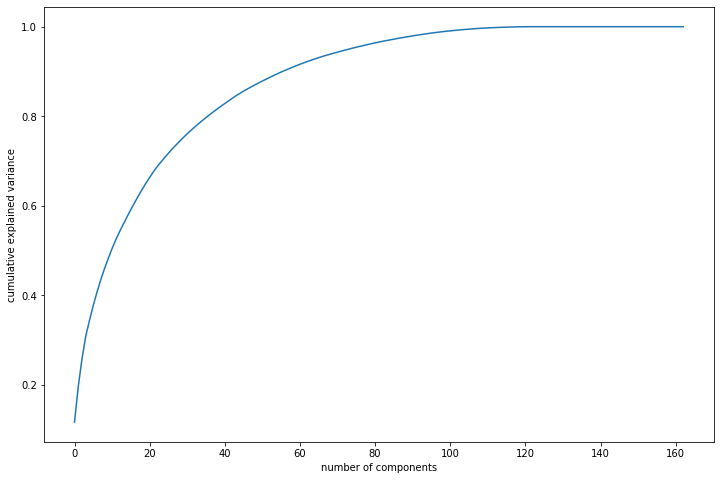

In [177]:
#Scree Plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [178]:
#Fitting the final PCA using 60 components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=60)
X_train_res_pca = pca_final.fit_transform(X_train_res)
X_train_res_pca = pd.DataFrame(X_train_res_pca)

In [179]:
X_train_res_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
0,-2.472492,4.150212,5.288968,0.988972,0.125391,-3.105508,-0.792476,-3.055506,0.011980,-0.733659,-1.890297,0.842150,-0.204225,-0.643473,-0.529033,0.350547,-0.984214,-1.359676,0.469177,-1.974696,-0.497748,0.142091,-0.709964,-0.524497,0.554201,0.092359,0.074602,-0.147673,-0.347911,-1.022236,1.126922,-0.153289,0.256355,-0.210924,-0.042351,-0.003693,-0.075434,-0.793540,0.226528,-0.151679,-0.657169,-0.196770,0.133939,-1.160068,-0.063280,-0.205970,0.421165,-0.351201,-0.404088,0.808611,-0.034465,0.171325,0.295334,0.027369,-0.125841,-0.487787,0.113488,0.388296,0.477816,0.118812
1,9.283186,0.652152,-0.923758,0.709410,-1.326328,2.265146,0.905782,-0.558688,1.036919,1.726142,-0.611867,0.659639,-2.039038,-1.763648,0.036254,-1.291974,-1.162721,0.340773,-1.973534,0.928529,0.125690,-0.021605,0.679490,-0.896476,0.218644,-0.684321,1.014350,0.409413,-0.440327,-0.997362,1.046167,0.953062,-0.592220,-0.012463,0.815340,-0.418402,1.454778,-0.503977,-0.009575,0.077854,-0.341123,0.303860,-0.264450,0.704552,-0.958420,-0.144511,0.105347,-0.973743,-1.147942,-0.566738,0.603045,0.357043,-0.373654,0.575864,0.874183,-0.289278,0.552068,0.936083,-1.330523,-0.614008
2,1.111905,-0.195288,-3.332128,0.549410,-0.148499,0.375852,-2.647940,-0.267348,-1.629266,-0.657116,-0.277187,-0.267692,-0.168369,-0.293861,-0.124422,0.190938,-0.341982,2.517373,-0.103015,-0.277054,-0.926552,-0.005326,0.458830,-0.364228,0.200138,-0.071531,0.747945,-0.460196,-0.188302,0.139674,0.646762,0.875623,1.398228,0.388636,-0.577716,0.396037,-0.287807,-0.614731,-0.327440,0.906227,1.641654,-0.812895,-1.298060,0.618380,0.263294,-0.660512,0.247399,0.100724,0.478890,0.331933,0.065814,-0.939236,-0.451988,0.807078,1.247965,-0.416347,-0.081423,0.017303,0.612546,0.124465
3,0.018641,3.892334,-2.754691,-0.788402,-1.654815,1.168504,-0.554491,0.900092,1.293979,-1.340434,1.716358,-0.800071,0.405415,-0.151353,0.642492,-0.396189,-1.595537,-0.867207,0.512038,-0.712147,-1.376686,0.062917,0.190719,-0.238453,-0.444886,-0.261503,-0.138973,-1.171684,-1.249263,-1.693434,-0.265504,1.021778,-0.549019,-0.751233,0.532180,0.316534,-1.453385,0.336159,0.826484,-0.822252,0.159909,-0.000218,-0.196266,0.238854,0.062160,-0.057080,-0.051517,0.353732,0.497646,-0.215311,0.304229,-1.529081,-0.118272,0.026935,0.013150,-0.615013,0.492969,0.090814,-0.242030,0.990681
4,7.842688,-7.117679,3.071050,25.774982,-0.325319,12.119107,0.795881,-2.385499,-5.953521,2.555882,2.195737,-1.405319,-2.781609,1.470441,-2.956541,-2.022293,4.121297,-10.111346,3.627127,2.710281,-0.109362,-0.330121,-0.997296,0.953724,-0.102800,2.710487,-1.470337,0.287061,2.927994,-4.038104,-2.228274,0.986855,-2.897133,-0.644627,0.693478,-0.935241,-0.249416,-0.073198,0.363062,-0.167136,-2.117861,-0.091535,-0.377920,1.191979,1.155806,-0.277356,0.231618,0.314229,3.024692,1.155915,0.117501,0.614788,-1.131424,-0.362205,-0.482165,0.195815,-0.812062,0.200785,0.056264,-0.001268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43891,0.251509,-1.202440,4.170544,2.746882,-1.162437,-1.989309,1.436498,-2.285150,1.746904,0.615507,-1.116367,0.315582,-1.529770,0.194962,-0.878848,0.220880,-0.666037,2.647153,1.328376,1.086658,-0.696103,0.189691,-0.807442,2.613927,-1.820089,-2.366906,-1.157072,-1.441666,-1.605652,0.323360,-0.120867,0.956545,0.796356,-0.286644,-0.629883,-0.334729,-0.498535,-0.208210,1.074799,0.308941,-0.328470,1.211204,0.263936,-1.180723,0.892070,0.723506,-0.042418,-0.204411,0.048745,0.121843,-0.148533,-0.520247,-3.016613,0.101844,-0.675934,0.501928,-0.157567,0.014881,-0.229392,0.048560
43892,-1.437663,2.967930,-1.923492,-0.900337,-2.726887,0.175808,4.867536,1.901776,-1.129290,1.770835,1.779229,-1.875986,-0.057901,-0.5

In [180]:
X_train_res_pca.shape

(43896, 60)

In [181]:
#Conver the PCA array to a dataframe
name = []
for i in range(0,60):
    string = 'PC' + str(i+1)
    name.append(string)
X_train_res_pca.columns = name
X_train_res_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-2.472492,4.150212,5.288968,0.988972,0.125391,-3.105508,-0.792476,-3.055506,0.011980,-0.733659,-1.890297,0.842150,-0.204225,-0.643473,-0.529033,0.350547,-0.984214,-1.359676,0.469177,-1.974696,-0.497748,0.142091,-0.709964,-0.524497,0.554201,0.092359,0.074602,-0.147673,-0.347911,-1.022236,1.126922,-0.153289,0.256355,-0.210924,-0.042351,-0.003693,-0.075434,-0.793540,0.226528,-0.151679,-0.657169,-0.196770,0.133939,-1.160068,-0.063280,-0.205970,0.421165,-0.351201,-0.404088,0.808611,-0.034465,0.171325,0.295334,0.027369,-0.125841,-0.487787,0.113488,0.388296,0.477816,0.118812
1,9.283186,0.652152,-0.923758,0.709410,-1.326328,2.265146,0.905782,-0.558688,1.036919,1.726142,-0.611867,0.659639,-2.039038,-1.763648,0.036254,-1.291974,-1.162721,0.340773,-1.973534,0.928529,0.125690,-0.021605,0.679490,-0.896476,0.218644,-0.684321,1.014350,0.409413,-0.440327,-0.997362,1.046167,0.953062,-0.592220,-0.012463,0.815340,-0.418402,1.454778,-0.503977,-0.009575,0.077854,-0.341123,0.303860,-0.264450,0.704552,-0.958420,-0.144511,0.105347,-0.973743,-1.147942,-0.566738,0.603045,0.357043,-0.373654,0.575864,0.874183,-0.289278,0.552068,0.936083,-1.330523,-0.614008
2,1.111905,-0.195288,-3.332128,0.549410,-0.148499,0.375852,-2.647940,-0.267348,-1.629266,-0.657116,-0.277187,-0.267692,-0.168369,-0.293861,-0.124422,0.190938,-0.341982,2.517373,-0.103015,-0.277054,-0.926552,-0.005326,0.458830,-0.364228,0.200138,-0.071531,0.747945,-0.460196,-0.188302,0.139674,0.646762,0.875623,1.398228,0.388636,-0.577716,0.396037,-0.287807,-0.614731,-0.327440,0.906227,1.641654,-0.812895,-1.298060,0.618380,0.263294,-0.660512,0.247399,0.100724,0.478890,0.331933,0.065814,-0.939236,-0.451988,0.807078,1.247965,-0.416347,-0.081423,0.017303,0.612546,0.124465
3,0.018641,3.892334,-2.754691,-0.788402,-1.654815,1.168504,-0.554491,0.900092,1.293979,-1.340434,1.716358,-0.800071,0.405415,-0.151353,0.642492,-0.396189,-1.595537,-0.867207,0.512038,-0.712147,-1.376686,0.062917,0.190719,-0.238453,-0.444886,-0.261503,-0.138973,-1.171684,-1.249263,-1.693434,-0.265504,1.021778,-0.549019,-0.751233,0.532180,0.316534,-1.453385,0.336159,0.826484,-0.822252,0.159909,-0.000218,-0.196266,0.238854,0.062160,-0.057080,-0.051517,0.353732,0.497646,-0.215311,0.304229,-1.529081,-0.118272,0.026935,0.013150,-0.615013,0.492969,0.090814,-0.242030,0.990681
4,7.842688,-7.117679,3.071050,25.774982,-0.325319,12.119107,0.795881,-2.385499,-5.953521,2.555882,2.195737,-1.405319,-2.781609,1.470441,-2.956541,-2.022293,4.121297,-10.111346,3.627127,2.710281,-0.109362,-0.330121,-0.997296,0.953724,-0.102800,2.710487,-1.470337,0.287061,2.927994,-4.038104,-2.228274,0.986855,-2.897133,-0.644627,0.693478,-0.935241,-0.249416,-0.073198,0.363062,-0.167136,-2.117861,-0.091535,-0.377920,1.191979,1.155806,-0.277356,0.231618,0.314229,3.024692,1.155915,0.117501,0.614788,-1.131424,-0.362205,-0.482165,0.195815,-0.812062,0.200785,0.056264,-0.001268


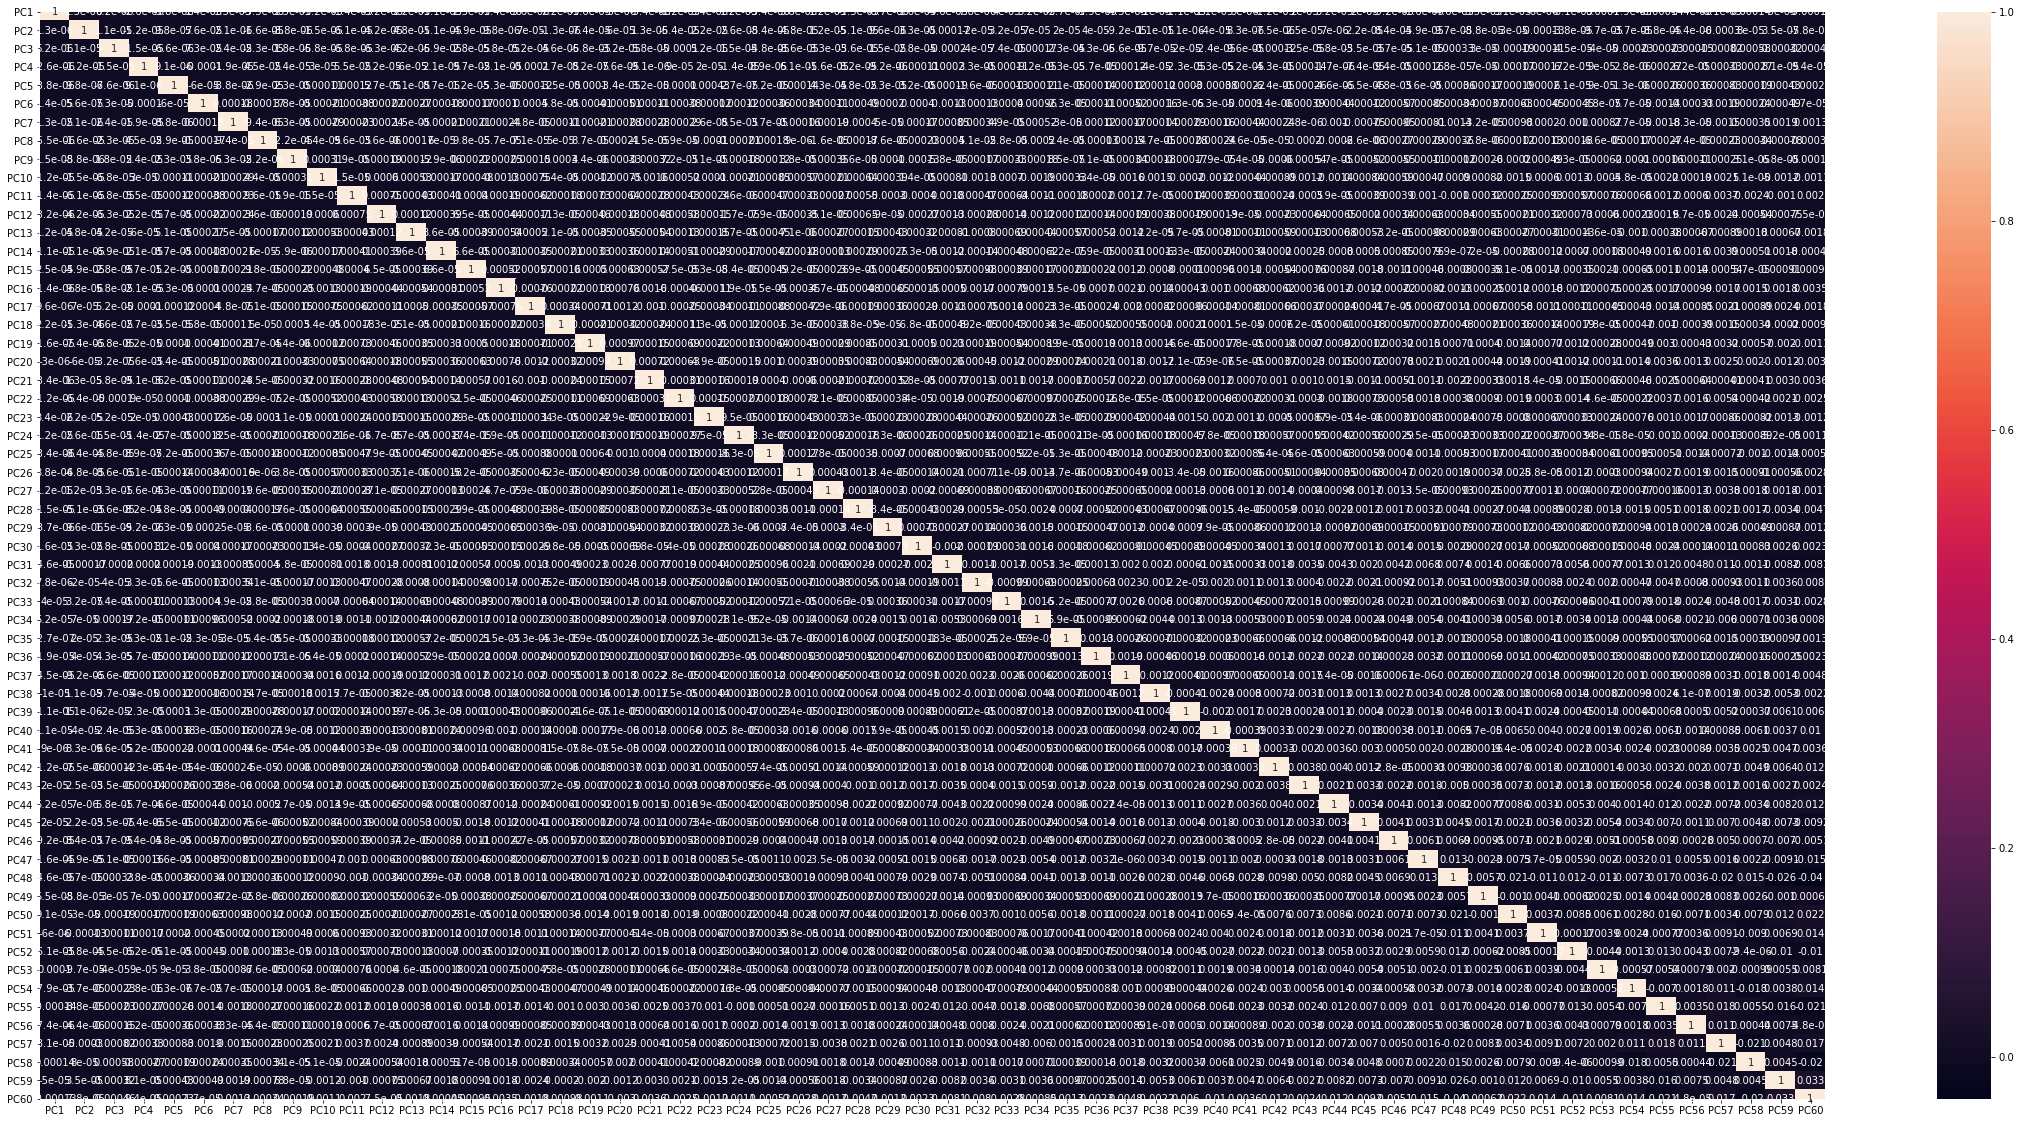

In [182]:
#Plot correlation among the variable
plt.figure(figsize = (40,20))        
sns.heatmap(X_train_res_pca.corr(),annot = True)

- Here, we see that there is almost zero correation among the variables in the PCA dataset. Next step would be to build models

## Modelling Part - II
- Building a Random Forest CLassifier to predict Churn
- Use Grid Search CV for Hyperparameter tuning
- Find the right probability cut-off
- Get the model performance metrics
- Decide on the final model

In [ ]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
param = { 
    'n_estimators': [5,10,15],
    'max_depth' : [8,9,10],
    'min_samples_split' : [4,5,6]
}

rf_cv_iter = GridSearchCV(estimator=rf, param_grid=param, cv= 5)
rf_cv_iter.fit(X_train_res_pca, y_train_res)

In [144]:
#Finding the best combination of parameters
rf_cv_iter.best_params_

{'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 15}

In [183]:
#Building an RF model using the above Hyperparameter combination
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 10, min_samples_split = 6, n_estimators = 15, random_state=42)

rf.fit(X_train_res_pca, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [185]:
#Finding the probability prediction through the model
y_pred = rf.predict_proba(X_train_res_pca)[:,1]
y_pred

array([0.07198986, 0.19673847, 0.11806863, ..., 0.38749275, 0.87648184,
       0.77818931])

In [186]:
#Converting the probability array into a dataframe
y_train_pred = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_pred})
y_train_pred.head()

,Churn,Churn_Prob
0,0.0,0.071990
1,0.0,0.196738
2,0.0,0.118069
3,0.0,0.030291
4,0.0,0.211014


In [247]:
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [248]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:',metrics.accuracy_score(y_train_pred.Churn, y_train_pred.predicted))

[[19539  2409]
 [ 1488 20460]]
Sensitivity: 0.929233842202882
Accuracy: 0.9112219792236195


In [196]:
#Finding probabilities on the test dataset
X_test_pca = pca_final.fit_transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca)
X_test_pca.columns = name
print(X_test_pca.head())
print(X_test_pca.shape)

             PC1          PC2          PC3          PC4          PC5  \
0 -755031.672052   762.995219  -557.704150  -552.440949  -919.661733   
1  496265.121140  1898.714587  -123.363420 -1516.400287  1192.134391   
2  206971.456141 -2451.550838  1077.823474    58.392768   348.799330   
3  880154.271340  -845.910141  -827.837501   675.306839    -8.729265   
4 -304034.434784  1158.483838  -236.038963  1116.952331  2441.648924   

           PC6          PC7          PC8          PC9        PC10  \
0 -2000.404437  1651.605834   312.327252   279.329783 -278.334325   
1  -804.097397   518.620660   333.705555   156.347415 -693.895491   
2  1177.968261  1257.456319    90.065397   246.730761  201.968684   
3   329.998360   426.176779    83.045118  -130.632161    5.676092   
4 -1307.116448 -1425.489250 -2431.723859  1831.641731 -741.901729   

          PC11        PC12        PC13        PC14         PC15        PC16  \
0   579.318772   75.908825  -52.263971   46.422381   219.832567 -975.4317

In [201]:
#Running the model on the Test dataset
y_test_prob = rf.predict_proba(X_test_pca)[:,1]
y_test_prob

array([0.4867619 , 0.34033613, 0.5224537 , ..., 0.54382124, 0.26433232,
       0.19225589])

In [250]:
y_test_pred = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_prob})

In [251]:
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_test_pred.Churn, y_test_pred.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred.Churn, y_test_pred.predicted))

[[4559  911]
 [ 446   87]]
Sensitivity: 0.0871743486973948
Acuracy: 0.7739463601532567


In [253]:
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred.Churn, y_train_pred.predicted))

[[20353  1595]
 [ 2930 19018]]
Sensitivity: 0.9226216465337408
Accuracy: 0.8969154364862402


In [254]:
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
confusion = metrics.confusion_matrix(y_test_pred.Churn, y_test_pred.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred.Churn, y_test_pred.predicted))

[[5266  204]
 [ 514   19]]
Sensitivity: 0.08520179372197309
Acuracy: 0.8803931367649509


In [255]:
y_train_pred['predicted'] = y_train_pred.Churn_Prob.map(lambda x: 1 if x > 0.7 else 0)
confusion = metrics.confusion_matrix(y_train_pred.Churn, y_train_pred.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred.Churn, y_train_pred.predicted))

[[20928  1020]
 [ 5262 16686]]
Sensitivity: 0.9423924093527618
Accuracy: 0.8568890103881903


In [256]:
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.7 else 0)
confusion = metrics.confusion_matrix(y_test_pred.Churn, y_test_pred.predicted)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred.Churn, y_test_pred.predicted))

Sensitivity: 0.1111111111111111
Acuracy: 0.9088788938863901


- At probability cut-off point of 0.7 we are seeing good balance of sensitivity and accuracy between the test and train dataets. Let us also try another iteration of Random Forest

In [230]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
param = { 
    'n_estimators': [10,15,20],
#     'max_features': ['auto', 'log2', 'sqrt'],
    'max_depth' : [6,7,8],
    'min_samples_split' : [4,5,6]
}

rf_cv_iter2 = GridSearchCV(estimator=rf1, param_grid=param, cv= 5)
rf_cv_iter2.fit(X_train_res_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [231]:
rf_cv_iter2.best_params_

{'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 20}

In [232]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(max_depth = 8, min_samples_split = 5, n_estimators = 20, random_state=42)

rf2.fit(X_train_res_pca, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [233]:
y_pred2 = rf2.predict_proba(X_train_res_pca)[:,1]
y_pred2

array([0.29292384, 0.19211589, 0.16250746, ..., 0.32177544, 0.86403987,
       0.75281183])

In [234]:
y_train_pred2 = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_pred2})
y_train_pred2.head()

,Churn,Churn_Prob
0,0.0,0.292924
1,0.0,0.192116
2,0.0,0.162507
3,0.0,0.092496
4,0.0,0.294428


In [257]:
y_train_pred2['predicted'] = y_train_pred2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred2.Churn, y_train_pred2.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred2.Churn, y_train_pred2.predicted))

[[18968  2980]
 [ 2413 19535]]
Sensitivity: 0.867643793026871
Accuracy: 0.8771414251868052


In [237]:
y_test_prob2 = rf2.predict_proba(X_test_pca)[:,1]
y_test_pred2 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_prob2})

In [259]:
y_test_pred2['predicted'] = y_test_pred2.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_test_pred2.Churn, y_test_pred2.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred2.Churn, y_test_pred2.predicted))

[[4966  504]
 [ 469   64]]
Sensitivity: 0.11267605633802817
Acuracy: 0.8379143761452607


In [260]:
y_train_pred2['predicted'] = y_train_pred2.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
confusion = metrics.confusion_matrix(y_train_pred2.Churn, y_train_pred2.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred2.Churn, y_train_pred2.predicted))

[[20128  1820]
 [ 4382 17566]]
Sensitivity: 0.9061178169813268
Accuracy: 0.8587114999088755


In [262]:
y_test_pred2['predicted'] = y_test_pred2.Churn_Prob.map(lambda x: 1 if x > 0.6 else 0)
confusion = metrics.confusion_matrix(y_test_pred2.Churn, y_test_pred2.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred2.Churn, y_test_pred2.predicted))

[[5410   60]
 [ 528    5]]
Sensitivity: 0.07692307692307693
Acuracy: 0.9020489755122438


In [263]:
y_train_pred2['predicted'] = y_train_pred2.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
confusion = metrics.confusion_matrix(y_train_pred2.Churn, y_train_pred2.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred2.Churn, y_train_pred2.predicted))

[[17065  4883]
 [ 1164 20784]]
Sensitivity: 0.8097557174582148
Accuracy: 0.8622425733552032


In [264]:
y_test_pred2['predicted'] = y_test_pred2.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
confusion = metrics.confusion_matrix(y_test_pred2.Churn, y_test_pred2.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred2.Churn, y_test_pred2.predicted))

[[3477 1993]
 [ 317  216]]
Sensitivity: 0.0977818017202354
Acuracy: 0.6151924037981009


In [265]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(random_state=42)

from sklearn.model_selection import GridSearchCV
param = { 
    'n_estimators': [10,15,20],
#     'max_features': ['auto', 'log2', 'sqrt'],
    'max_depth' : [4,5,6],
    'min_samples_split' : [4,5,6]
}

rf_cv_iter3 = GridSearchCV(estimator=rf2, param_grid=param, cv= 5)
rf_cv_iter3.fit(X_train_res_pca, y_train_res)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [266]:
rf_cv_iter3.best_params_

{'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 20}

In [267]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(max_depth = 6, min_samples_split = 6, n_estimators = 20, random_state=42)

rf3.fit(X_train_res_pca, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [268]:
y_pred3 = rf3.predict_proba(X_train_res_pca)[:,1]
y_train_pred3 = pd.DataFrame({'Churn':y_train_res, 'Churn_Prob':y_pred3})

In [269]:
#Running the model on the Test dataset
y_test_prob3 = rf3.predict_proba(X_test_pca)[:,1]
y_test_pred3 = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_prob3})

In [270]:
y_train_pred3['predicted'] = y_train_pred3.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_train_pred3.Churn, y_train_pred3.predicted )
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Accuracy:', metrics.accuracy_score(y_train_pred3.Churn, y_train_pred3.predicted))

[[18478  3470]
 [ 3216 18732]]
Sensitivity: 0.8437077740744077
Accuracy: 0.8476854383087298


In [271]:
y_test_pred3['predicted'] = y_test_pred3.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
confusion = metrics.confusion_matrix(y_test_pred3.Churn, y_test_pred3.predicted)
print(confusion)
sensitivity = confusion[1,1]/(confusion[0,1] + confusion[1,1])
print('Sensitivity:',sensitivity)
print('Acuracy:',metrics.accuracy_score(y_test_pred3.Churn, y_test_pred3.predicted))

[[4980  490]
 [ 464   69]]
Sensitivity: 0.12343470483005367
Acuracy: 0.841079460269865
